In [1]:
import requests
import collections
import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
req = requests.get('https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query=%EC%BD%94%EB%A1%9C%EB%82%98&sm=tab_pge&srchby=all&st=sim&where=post&start=1')

In [33]:
html = req.text
header = req.headers

In [34]:
status = req.status_code
status

200

In [35]:
from bs4 import BeautifulSoup

In [36]:
soup = BeautifulSoup(html, 'html.parser')

In [65]:
for page in range(1, 100, 10):
    print(page)

1
11
21
31
41
51
61
71
81
91


In [121]:
s = []
for page in range(1, 100, 10):
    raw = requests.get('https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query=%EC%BD%94%EB%A1%9C%EB%82%98&sm=tab_pge&srchby=all&st=sim&where=post&start='+str(page),
                         headers = {"User-Agent" : "Mozilla/5.0"})
    html = BeautifulSoup(raw.text, 'html.parser')


    article = html.select('ul.type01 > li')

    
    for ar in article:

        title = ar.select_one("ul.type01 > li a.sh_blog_title._sp_each_url._sp_each_title").text
        s += [title]

In [123]:
from collections import Counter

In [157]:
with open("corona.txt", "w") as output:
    output.write(str(s))

In [175]:
my_file = open("/Users/kimginam/Kaggle/corona.txt", "r")
content = my_file.read()

In [176]:
content = content.split(',')
content = str(content)

In [177]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = '코로나 2020 위한 차이는' 
stop_words = stop_words.split(' ')

word_tokens = word_tokenize(content)


result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
result = str(result)

In [178]:
words = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', result)

In [179]:
word_tokens = word_tokenize(words)

In [180]:
words = collections.Counter(word_tokens)
words = dict(words)

In [181]:
words = dict(sorted(words.items(), key=operator.itemgetter(1),reverse=True))

In [182]:
keys_to_remove = ["코로나", "\\\\",'코로나19로','코로나19','25단계','']
for key in keys_to_remove:
    words.pop(key)

In [183]:
words

{'3단계': 6,
 '극복': 4,
 '관련': 4,
 '25단계': 3,
 '방역': 3,
 '브리핑': 3,
 '19': 3,
 '예방을': 3,
 '언택트': 3,
 '이후': 3,
 '확진자': 3,
 '검사': 2,
 '기준': 2,
 '이유는': 2,
 '포스트': 2,
 '코로나블루': 2,
 '20대': 2,
 '및': 2,
 '이후의': 2,
 '달라지는': 2,
 '마음': 2,
 '블루': 2,
 '방법': 2,
 '마스크': 2,
 '달라진': 2,
 '점': 2,
 '대응': 2,
 '쓰면': 2,
 '못': 2,
 'SARSCoV2': 2,
 '수': 2,
 '보는': 2,
 '새로운': 2,
 '치료': 2,
 '시대에': 2,
 '’': 2,
 '위해': 2,
 '디자인': 2,
 '온라인': 2,
 '술': 2,
 '시대의': 2,
 '코로나19가': 2,
 '발생': 2,
 '확산': 2,
 '지친': 2,
 '무증상자': 1,
 '후기': 1,
 '영등포': 1,
 '선별진료소': 1,
 '성애병원': 1,
 '총정리': 1,
 '카페': 1,
 '술집': 1,
 '못가는가': 1,
 '사회적': 1,
 '거리두기': 1,
 '2단계': 1,
 '\\\\코로나': 1,
 '백신은': 1,
 '언제쯤': 1,
 '백신': 1,
 '개발이': 1,
 '오래': 1,
 '걸리는': 1,
 '격상': 1,
 '검토': 1,
 '방지를': 1,
 '나만의': 1,
 '팁': 1,
 '건설': 1,
 '가구': 1,
 '가전': 1,
 '판매액': 1,
 '증가는': 1,
 '영향일까': 1,
 '코로나시대': 1,
 '유럽여행': 1,
 '코로나보다': 1,
 '무서운': 1,
 '심리방역은': 1,
 '어떻게': 1,
 '자연치유한': 1,
 '여성': 1,
 '완치자의': 1,
 '심각한': 1,
 '후유증': 1,
 '고용유지지원금': 1,
 '조건': 1,
 '신청': 1,
 '무급유급': 1,
 'Feat': 1,
 '재확산

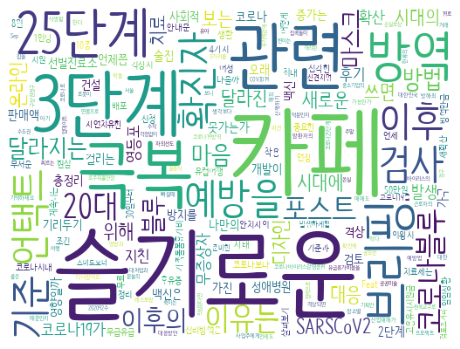

In [184]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(font_path = '/Users/kimginam/Downloads/NanumBarunpenR.ttf',
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(words))
plt.rcParams['font.family'] = 'AppleGothic'
plt.imshow(wordcloud)
plt.axis('off')

plt.show()